# Import Libraries

In [ ]:
# !pip install imblearn --upgrade

In [8]:
import os
os.getcwd()
# os.chdir(r'')
# os.getcwd()

'E:\\PYTHONCLASSJUPYTER\\PrakashSenapati\\2024_10_21_Diabetic Prediction'

In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score

In [12]:
from imblearn.over_sampling import SMOTE

# Load and Preview Dataset

### <font color='red'>__Preview Dataset__</font>

In [15]:
df = pd.read_csv(r'E:\PYTHONCLASSJUPYTER\PrakashSenapati\2024_10_21_Diabetic Prediction\diabetes_prediction_dataset.csv')

In [16]:
df.shape

(100000, 9)

In [17]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [19]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [21]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [22]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [25]:
for col in df.columns:
    print(df[col].value_counts())
    print('====================')

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64
age
80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: count, Length: 102, dtype: int64
hypertension
0    92515
1     7485
Name: count, dtype: int64
heart_disease
0    96058
1     3942
Name: count, dtype: int64
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64
bmi
27.32    25495
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
58.23        1
48.18        1
55.57        1
57.07        1
60.52        1
Name: count, Length: 4247, dtype: int64
HbA1c_level
6.6    8540
5.7    8413
6.5    8362
5.8    8321
6.0    8295
6.2    8269
6.1    8048
3.5    7662
4.8    7597
4.5    7585
4.0    7542
5.0    7471
8.8     661
8.2     661
9.0     654
7.5     643
6.8     642
7.0   

### <font color='red'>__Check imbalance variable/parameter/attribute/feature__</font>

**Column `diabetes` value_counts percentages**

In [59]:
(df['diabetes'].value_counts()/len(df))*100

diabetes
0    91.5
1     8.5
Name: count, dtype: float64

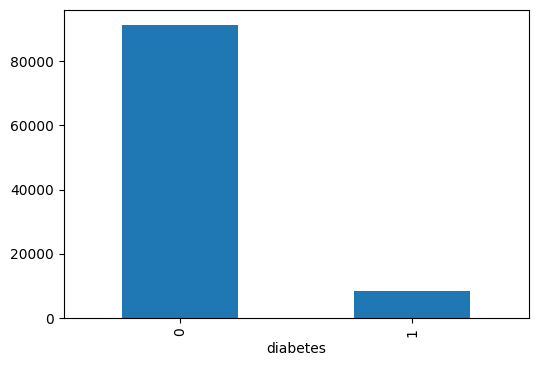

In [36]:
plt.figure(figsize=(6,4))
df['diabetes'].value_counts().plot(kind='bar');

* Observations:
  - **Above chart is showing that dataset target/prediction variable (`diabetes`) is imbalance 🠉**
  - Column `smoking_history' contains 35816 'No Info' values
  - Column `gender' contains 18 'Other' values

### <font color='red'>__Check null values__</font>

In [18]:
df.isna().any()

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool

### <font color='red'>__Correlations between variables__</font>

In [37]:
df.corr(numeric_only=True)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


**_All variables are positively correlated_**

### <font color='red'>__Check unique values of each column__</font>

In [40]:
for col in df.columns:
    unique_values = df[col].unique()
    print('Column `{}` has unique values: {}'.format(col, unique_values))
    print('-------------------------------------------------------------')

Column `gender` has unique values: ['Female' 'Male' 'Other']
-------------------------------------------------------------
Column `age` has unique values: [80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
-------------------------------------------------------------
Column `hypertension` has unique values: [0 1]
-------------------------------------------------------------
Column `heart_disease` has unique values: [1 0]
--------------

# EDA on Dataset

### <font color='red'>__'smoking_history' normalisation__</font>

In [ ]:
# df['smoking_history'].value_counts()

**`smoking_history` value count's percentages**

In [42]:
(df['smoking_history'].value_counts()/len(df))*100

smoking_history
No Info        35.816
never          35.095
former          9.352
current         9.286
not current     6.447
ever            4.004
Name: count, dtype: float64

In [43]:
df['smoking_history'] = df['smoking_history'].replace('No Info', pd.NA)
mode_value = df['smoking_history'].mode()[0]
df['smoking_history'] = df['smoking_history'].fillna(mode_value)
print(df['smoking_history'].value_counts())

smoking_history
never          70911
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


**'No Info' has been replaced with 'never' because mode of 'smoking_history' was 'never' i.e. 35.095%**

### <font color='red'>__Removing `,` in `bmi` parameter__</font>

In [57]:
df['bmi'] = [float(str(i).replace(',' , '')) for i in df['bmi']]

### <font color='red'>__Label Encoding `gender` & `smoking_history` columns__</font>

In [64]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [65]:
df['smoking_history'].value_counts()

smoking_history
never          70911
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [62]:
le = LabelEncoder()
le

LabelEncoder()

In [66]:
Label_encod_columns = ['gender','smoking_history']
df[Label_encod_columns] = df[Label_encod_columns].apply(le.fit_transform)

In [67]:
df['gender'].value_counts()

gender
0    58552
1    41430
2       18
Name: count, dtype: int64

In [68]:
df['smoking_history'].value_counts()

smoking_history
3    70911
2     9352
0     9286
4     6447
1     4004
Name: count, dtype: int64

In [69]:
df.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,3,25.19,6.6,140,0
1,0,54.0,0,0,3,27.32,6.6,80,0
2,1,28.0,0,0,3,27.32,5.7,158,0


### <font color='red'>__Few Useful Plots__</font>

In [70]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

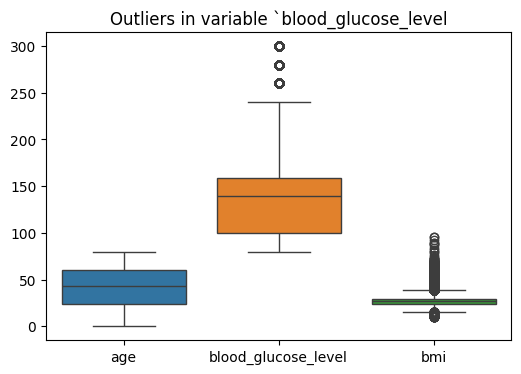

In [102]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(data = df[['age', 'blood_glucose_level', 'bmi']], ax=ax)
plt.title('Outliers in variable `blood_glucose_level');
plt.show()

**_Column 'blood_glucose_level' have few outliers_**

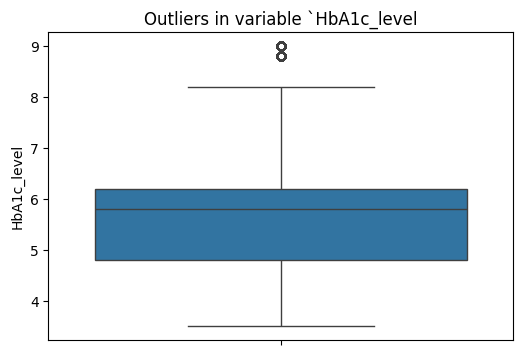

In [103]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.title('Outliers in variable `HbA1c_level');
sns.boxplot(data=df['HbA1c_level'], ax=ax);

**_Column 'HbA1c_level' have few outliers_**

''' it is always good to ignore outliers in medical data '''

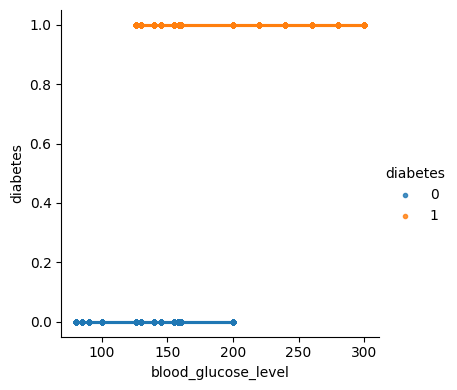

In [112]:
sns.lmplot(data=df, x='blood_glucose_level', y='diabetes', hue='diabetes', markers='.', height=4);

Text(0.5, 1.0, 'Scattering between `age` vs `bmi`')

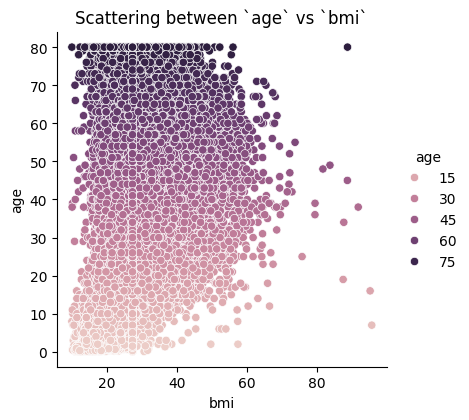

In [101]:
sns.pairplot(df, x_vars='bmi', y_vars='age', hue='age', height=4)
plt.title('Scattering between `age` vs `bmi`')

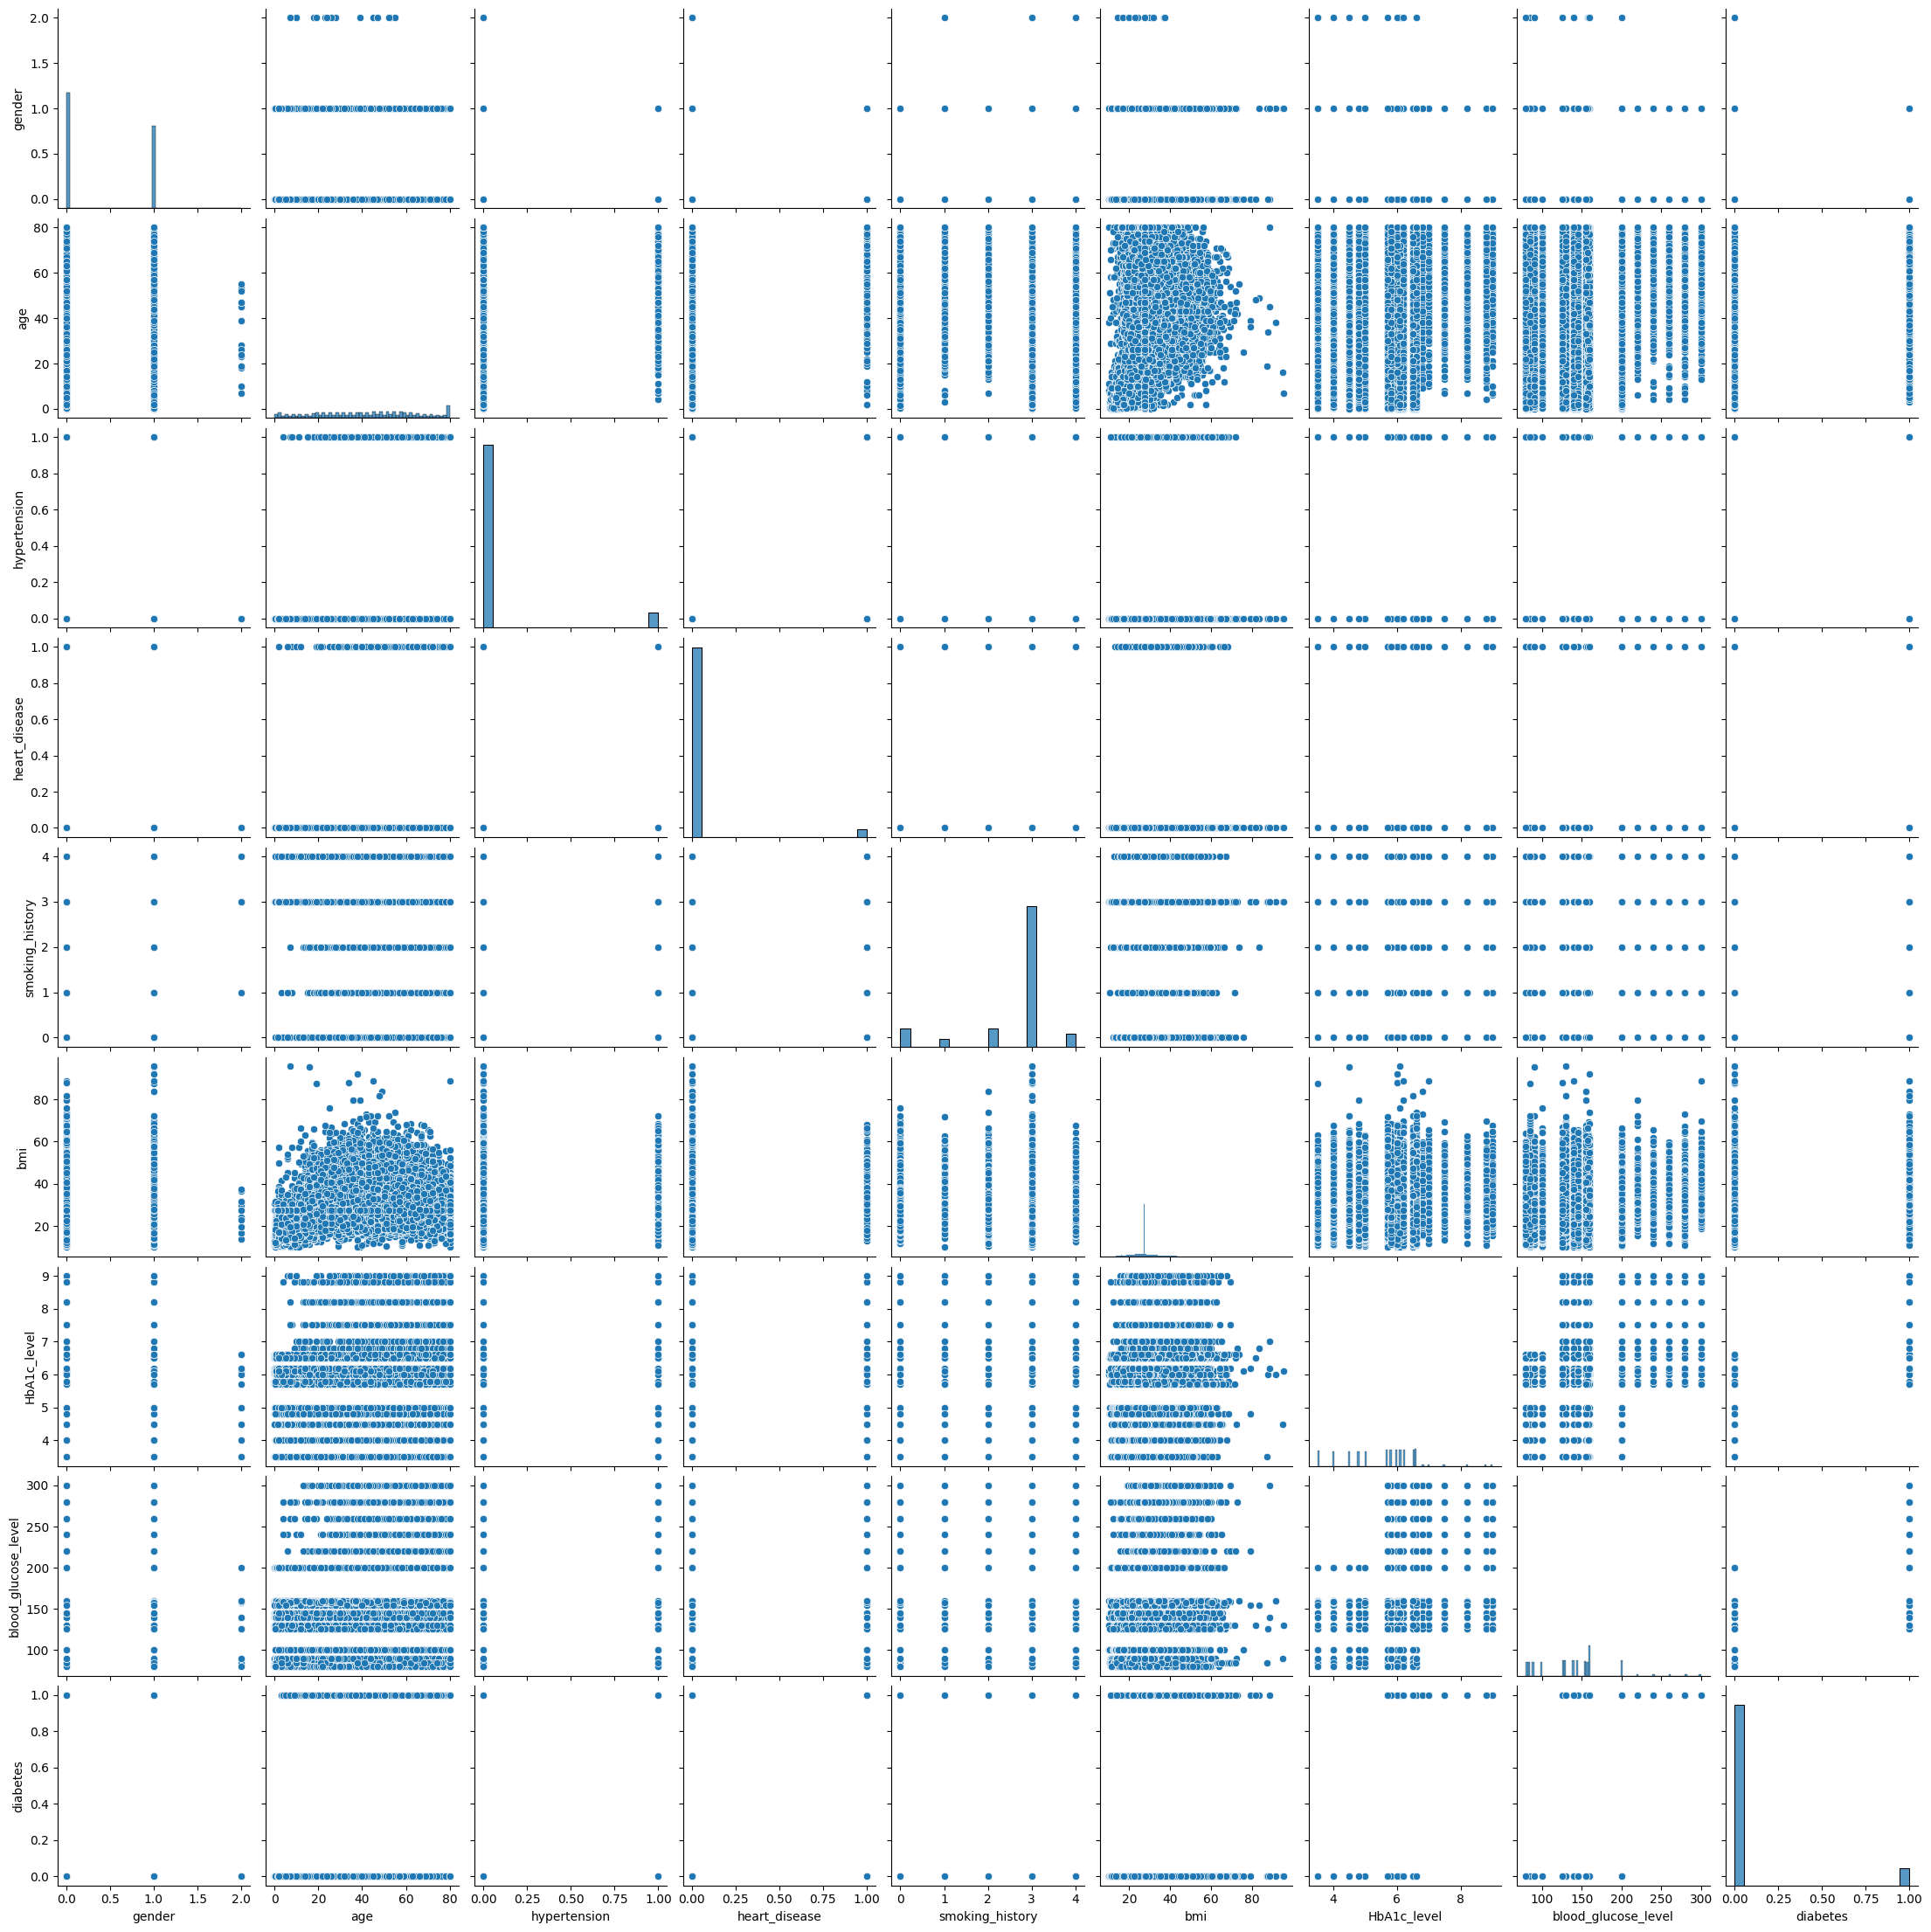

In [86]:
sns.pairplot(df)
plt.show()

In [93]:
df.corr()['diabetes'].sort_values(ascending=False)

diabetes               1.000000
blood_glucose_level    0.419558
HbA1c_level            0.400660
age                    0.258008
bmi                    0.214357
hypertension           0.197823
heart_disease          0.171727
gender                 0.037411
smoking_history       -0.049841
Name: diabetes, dtype: float64

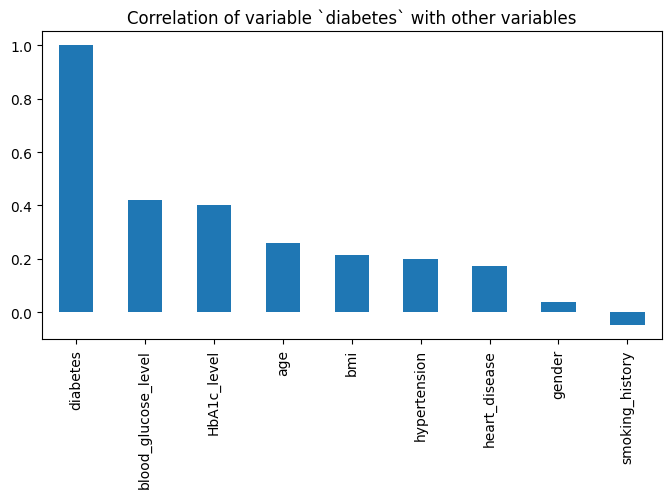

In [99]:
plt.figure(figsize=(8,4))
df.corr()['diabetes'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation of variable `diabetes` with other variables');

# Selecting Training (X) and Testing (y) variables

In [113]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,3,25.19,6.6,140,0
1,0,54.0,0,0,3,27.32,6.6,80,0
2,1,28.0,0,0,3,27.32,5.7,158,0
3,0,36.0,0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,0,20.14,4.8,155,0


In [116]:
df.loc[: , 'age':'heart_disease'][0:5]

,age,hypertension,heart_disease
0,80.0,0,1
1,54.0,0,0
2,28.0,0,0
3,36.0,0,0
4,76.0,1,1


In [117]:
df.loc[:, 'bmi':'blood_glucose_level'][0:5]

,bmi,HbA1c_level,blood_glucose_level
0,25.19,6.6,140
1,27.32,6.6,80
2,27.32,5.7,158
3,23.45,5.0,155
4,20.14,4.8,155


In [118]:
X = df.loc[:, 'age':'heart_disease'].join(df.loc[:, 'bmi':'blood_glucose_level']) 
X[0:5]

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,80.0,0,1,25.19,6.6,140
1,54.0,0,0,27.32,6.6,80
2,28.0,0,0,27.32,5.7,158
3,36.0,0,0,23.45,5.0,155
4,76.0,1,1,20.14,4.8,155


In [119]:
y=df.loc[:,'diabetes']
y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

# Splitting Training (X) and Testing (y) variables as Training & Testing Set

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [121]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 6)
(20000, 6)
(80000,)
(20000,)


In [122]:
X_train[0:5]

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
10382,2.0,0,0,16.45,6.2,159
73171,55.0,0,0,24.59,6.0,130
30938,24.0,0,0,21.77,4.5,130
99310,30.0,0,0,27.32,6.2,159
58959,13.0,0,0,18.37,6.5,130


In [123]:
X_test[0:5]

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
3582,52.0,0,0,27.32,4.8,140
60498,56.0,0,0,27.32,4.8,100
53227,22.0,0,0,37.16,6.6,85
21333,49.0,0,0,43.83,5.0,160
3885,10.0,0,0,14.18,4.0,155


In [124]:
y_train[0:5]

10382    0
73171    0
30938    0
99310    0
58959    0
Name: diabetes, dtype: int64

In [125]:
y_test[0:5]

3582     0
60498    0
53227    0
21333    0
3885     0
Name: diabetes, dtype: int64

# Feature Scaling (X_train, X_test)

### <font color='red'>__Convert X_test to 2D Array (Here it is not applicable)__</font>

In [135]:
# X_test[0:5]

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
3582,52.0,0,0,27.32,4.8,140
60498,56.0,0,0,27.32,4.8,100
53227,22.0,0,0,37.16,6.6,85
21333,49.0,0,0,43.83,5.0,160
3885,10.0,0,0,14.18,4.0,155


In [136]:
# X_test.shape

(20000, 6)

In [137]:
# len(X_test.shape)

2

In [141]:
# if len(X_test.shape) == 1:
#     X_test = X_test.values.reshape(-1, 1)

In [142]:
# X_test.shape

(20000, 6)

In [143]:
# len(X_test.shape)

2

In [144]:
# X_test[0:5]

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
3582,52.0,0,0,27.32,4.8,140
60498,56.0,0,0,27.32,4.8,100
53227,22.0,0,0,37.16,6.6,85
21333,49.0,0,0,43.83,5.0,160
3885,10.0,0,0,14.18,4.0,155


### <font color='red'>__Standardization__</font>

In [145]:
ss = StandardScaler()

In [146]:
X_train_scaled = ss.fit_transform(X_train)

In [147]:
print(X_train_scaled[0:5])

[[-1.77286554 -0.28359137 -0.20225645 -1.63680432  0.62804769  0.51774497]
 [ 0.58060311 -0.28359137 -0.20225645 -0.41313457  0.44130554 -0.19569252]
 [-0.79595402 -0.28359137 -0.20225645 -0.83705947 -0.95926057 -0.19569252]
 [-0.52952361 -0.28359137 -0.20225645 -0.00273918  0.62804769  0.51774497]
 [-1.28440978 -0.28359137 -0.20225645 -1.3481746   0.90816092 -0.19569252]]


In [148]:
X_test_scaled = ss.fit_transform(X_test)

In [149]:
print(X_test_scaled[0:5])

[[ 0.45638517 -0.28781423 -0.20385821  0.01050279 -0.68086188  0.03731887]
 [ 0.63413806 -0.28781423 -0.20385821  0.01050279 -0.68086188 -0.93964685]
 [-0.87676151 -0.28781423 -0.20385821  1.50720775  1.00240285 -1.30600899]
 [ 0.3230705  -0.28781423 -0.20385821  2.52174251 -0.49383247  0.52580173]
 [-1.41002019 -0.28781423 -0.20385821 -1.9881459  -1.42897954  0.40368101]]


# Logistic Regression (Imbalanced Dataset)

In [150]:
model_lr = LogisticRegression()

In [151]:
model_lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [154]:
y_pred = model_lr.predict(X_test_scaled)
y_pred.shape

(20000,)

In [164]:
print(y_pred[0:10])

[0 0 0 0 0 0 0 0 0 0]


In [166]:
print( accuracy_score(y_pred, y_test) )

0.95975


In [167]:
print (classification_report(y_pred, y_test) )

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     18736
           1       0.63      0.86      0.73      1264

    accuracy                           0.96     20000
   macro avg       0.81      0.91      0.85     20000
weighted avg       0.97      0.96      0.96     20000



In [168]:
print( confusion_matrix(y_pred, y_test) )

[[18114   622]
 [  183  1081]]


In [172]:
y_train.shape

(80000,)

In [171]:
y_train.value_counts()

diabetes
0    73203
1     6797
Name: count, dtype: int64

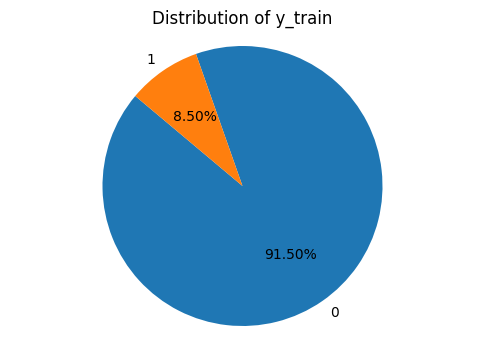

In [173]:
value_counts = y_train.value_counts()
plt.figure(figsize=(6, 4))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.2f%%', startangle=140)
plt.title('Distribution of y_train')
plt.axis('equal')
plt.show()

# Transform (X, y) as Balanced Dataset (X_ovs, y_ovs)

In [174]:
X.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,80.0,0,1,25.19,6.6,140
1,54.0,0,0,27.32,6.6,80
2,28.0,0,0,27.32,5.7,158
3,36.0,0,0,23.45,5.0,155
4,76.0,1,1,20.14,4.8,155


In [175]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [176]:
X.shape

(100000, 6)

In [177]:
y.shape

(100000,)

In [178]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_ovs, y_ovs = smote.fit_resample(X, y)

In [179]:
X_ovs.shape

(183000, 6)

In [180]:
y_ovs.shape

(183000,)

In [181]:
X_ovs.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,80.0,0,1,25.19,6.6,140
1,54.0,0,0,27.32,6.6,80
2,28.0,0,0,27.32,5.7,158
3,36.0,0,0,23.45,5.0,155
4,76.0,1,1,20.14,4.8,155


In [182]:
y_ovs.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [186]:
for col in X_ovs.columns:
    print(X_ovs[col].value_counts())
    print('========================')

age
80.000000    15094
62.000000     2652
57.000000     2479
61.000000     2325
66.000000     2207
             ...  
47.649694        1
61.551824        1
64.639233        1
56.896969        1
63.730204        1
Name: count, Length: 49516, dtype: int64
hypertension
0    168352
1     14648
Name: count, dtype: int64
heart_disease
0    175706
1      7294
Name: count, dtype: int64
bmi
27.320000    35823
23.000000      103
27.800000      101
25.600000      101
27.120000      101
             ...  
31.589258        1
24.247427        1
46.441505        1
27.853593        1
21.770260        1
Name: count, Length: 76709, dtype: int64
HbA1c_level
5.700000    9497
6.600000    9380
5.800000    9199
6.000000    9101
6.500000    8967
            ... 
6.179033       1
6.647329       1
5.901960       1
7.092583       1
6.015837       1
Name: count, Length: 70978, dtype: int64
blood_glucose_level
159    16431
130    14531
145    14057
200    13930
140    13755
126    13693
155    13208
160    12304
2

In [183]:
y_ovs.value_counts()

diabetes
0    91500
1    91500
Name: count, dtype: int64

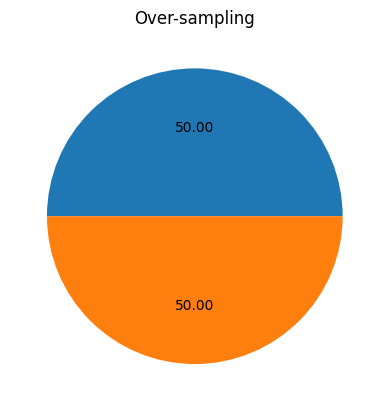

In [187]:
fig, ax = plt.subplots() 
ax.pie( y_ovs.value_counts(), autopct='%.2f')
ax.set_title('Over-sampling')
plt.show()

# Splitting Balanced Training and Testing variables as:
- Training (Xr_train, yr_train)
- Testing Set (Xr_test, Xr_test)

In [188]:
Xr_train, Xr_test, yr_train, Xr_test = train_test_split(X_ovs, y_ovs, train_size=0.7, random_state=42)

In [189]:
print( Xr_train.shape )
print( Xr_test.shape )
print( yr_train.shape )
print( yr_test.shape )

(128099, 6)
(54901, 6)
(128099,)
(54901,)


In [194]:
print( yr_train.value_counts() )

diabetes
0    64131
1    63968
Name: count, dtype: int64


In [195]:
print( yr_test.value_counts() )

diabetes
1    27532
0    27369
Name: count, dtype: int64


In [190]:
Xr_train[0:5]

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
118683,41.303419,0,0,30.029915,6.848291,240
66823,18.000000,0,0,24.500000,6.600000,130
51170,61.000000,0,1,29.160000,5.000000,100
169751,72.523157,0,0,33.954648,6.656947,240
65485,63.000000,1,0,40.350000,6.100000,158


In [191]:
Xr_test[0:5]

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
180328,62.0,0,0,27.32,6.581091,300
573,27.0,0,0,26.46,6.600000,160
13494,19.0,0,0,27.32,6.600000,80
93981,34.0,1,0,31.56,6.600000,85
75389,21.0,0,0,27.32,3.500000,100


In [192]:
yr_train[0:5]

118683    1
66823     0
51170     0
169751    1
65485     0
Name: diabetes, dtype: int64

In [193]:
yr_test[0:5]

180328    1
573       0
13494     0
93981     0
75389     0
Name: diabetes, dtype: int64

# Feature Scaling (Xr_train, Xr_test)

In [196]:
ss = StandardScaler()
ss

StandardScaler()

In [197]:
xr_train_sc = ss.fit_transform(Xr_train)

In [198]:
xr_train_sc.shape

(128099, 6)

In [201]:
print( xr_train_sc[0:5] )

[[-0.4284351  -0.2949008  -0.20323115  0.07916363  0.57095215  1.34925045]
 [-1.51143988 -0.2949008  -0.20323115 -0.671897    0.36898863 -0.58723899]
 [ 0.48694523 -0.2949008   4.92050564 -0.03898622 -0.93247712 -1.11537248]
 [ 1.02247327 -0.2949008  -0.20323115  0.61221212  0.41531034  1.34925045]
 [ 0.57989338  3.39097078 -0.20323115  1.48081456 -0.03771942 -0.09431441]]


In [202]:
xr_test_sc = ss.fit_transform(Xr_test)

In [203]:
xr_test_sc.shape

(54901, 6)

In [204]:
print( xr_test_sc[0:5] )

[[ 0.52737561 -0.29513634 -0.20494383 -0.28997627  0.35490467  2.38980362]
 [-1.09773089 -0.29513634 -0.20494383 -0.40697411  0.37030961 -0.06323955]
 [-1.46918381 -0.29513634 -0.20494383 -0.28997627  0.37030961 -1.46497851]
 [-0.77270959  3.38826452 -0.20494383  0.28685026  0.37030961 -1.37736982]
 [-1.37632058 -0.29513634 -0.20494383 -0.28997627 -2.15519165 -1.11454377]]


In [205]:
Xr_train_scaled = pd.DataFrame(xr_train_sc)

In [206]:
Xr_train_scaled.shape

(128099, 6)

In [207]:
Xr_train_scaled.head()

,0,1,2,3,4,5
0,-0.428435,-0.294901,-0.203231,0.079164,0.570952,1.349250
1,-1.511440,-0.294901,-0.203231,-0.671897,0.368989,-0.587239
2,0.486945,-0.294901,4.920506,-0.038986,-0.932477,-1.115372
3,1.022473,-0.294901,-0.203231,0.612212,0.415310,1.349250
4,0.579893,3.390971,-0.203231,1.480815,-0.037719,-0.094314


In [208]:
Xr_test_scaled = pd.DataFrame(xr_test_sc)

In [209]:
Xr_test_scaled.shape

(54901, 6)

In [210]:
Xr_test_scaled.head()

,0,1,2,3,4,5
0,0.527376,-0.295136,-0.204944,-0.289976,0.354905,2.389804
1,-1.097731,-0.295136,-0.204944,-0.406974,0.370310,-0.063240
2,-1.469184,-0.295136,-0.204944,-0.289976,0.370310,-1.464979
3,-0.772710,3.388265,-0.204944,0.286850,0.370310,-1.377370
4,-1.376321,-0.295136,-0.204944,-0.289976,-2.155192,-1.114544


# Logistic Regression (Balanced Dataset)

In [212]:
model_lk = LogisticRegression()
model_lk.fit(Xr_train_scaled, yr_train)

LogisticRegression()

In [214]:
y_pred_lr = model_lk.predict(Xr_test_scaled)
print( y_pred_lr.shape )
print( y_pred_lr[:10] )

(54901,)
[1 0 0 0 0 1 0 0 0 1]


In [215]:
yr_train[:10]

118683    1
66823     0
51170     0
169751    1
65485     0
36945     0
80813     0
75011     0
110692    1
118491    1
Name: diabetes, dtype: int64

In [216]:
yr_test[:10]

180328    1
573       0
13494     0
93981     0
75389     0
180973    1
71021     0
19293     0
16393     0
121419    1
Name: diabetes, dtype: int64

In [217]:
yr_train.shape

(128099,)

In [218]:
yr_test.shape

(54901,)

In [219]:
print( classification_report(y_pred_lr, yr_test) )

              precision    recall  f1-score   support

           0       0.88      0.89      0.89     27307
           1       0.89      0.89      0.89     27594

    accuracy                           0.89     54901
   macro avg       0.89      0.89      0.89     54901
weighted avg       0.89      0.89      0.89     54901



**Compare it with above classification_report() for imbalanced dataset**
- Precision with balanced dataset is good

In [220]:
print( confusion_matrix(y_pred_lr, yr_test) )

[[24197  3110]
 [ 3172 24422]]


# DecisionTreeClassifier

In [221]:
model_dtc = DecisionTreeClassifier() 
model_dtc.fit(Xr_train_scaled, yr_train)

DecisionTreeClassifier()

In [223]:
y_pred_dtc = model_dtc.predict(Xr_test_scaled)
print( y_pred_dtc.shape )
print( y_pred_dtc[:10] )

(54901,)
[1 1 1 1 0 1 0 1 0 1]


In [224]:
print( classification_report(y_pred_dtc, yr_test) )

              precision    recall  f1-score   support

           0       0.69      0.99      0.81     19006
           1       1.00      0.76      0.86     35895

    accuracy                           0.84     54901
   macro avg       0.84      0.88      0.84     54901
weighted avg       0.89      0.84      0.85     54901



In [225]:
print( confusion_matrix(y_pred_dtc, yr_test) )

[[18876   130]
 [ 8493 27402]]


# RandomForestClassifier()

In [226]:
model_rfc = RandomForestClassifier()
model_rfc.fit(Xr_train_scaled, yr_train)

RandomForestClassifier()

In [227]:
y_pred_rfc = model_rfc.predict(Xr_test_scaled)
y_pred_rfc.shape

(54901,)

In [229]:
print( y_pred_rfc[:10] )

[1 1 1 1 0 1 0 0 0 1]


In [230]:
print( classification_report(y_pred_rfc, yr_test) )

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     22479
           1       0.99      0.84      0.91     32422

    accuracy                           0.90     54901
   macro avg       0.90      0.92      0.90     54901
weighted avg       0.92      0.90      0.90     54901



In [231]:
print( confusion_matrix(y_pred_rfc, yr_test) )

[[22244   235]
 [ 5125 27297]]


# XGBOOSTClassifier

In [232]:
model_xgb = XGBClassifier()
model_xgb.fit(Xr_train_scaled, yr_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [233]:
y_pred_xgb = model_xgb.predict(Xr_test_scaled)
y_pred_xgb.shape

(54901,)

In [234]:
print( y_pred_xgb[0:10] )

[1 0 0 0 0 1 0 0 0 1]


In [235]:
print( classification_report(y_pred_xgb, yr_test) )

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     26264
           1       0.93      0.90      0.91     28637

    accuracy                           0.91     54901
   macro avg       0.91      0.91      0.91     54901
weighted avg       0.91      0.91      0.91     54901



In [236]:
print( confusion_matrix(y_pred_xgb, yr_test) )

[[24424  1840]
 [ 2945 25692]]


# Finding the hyperparameter tuning and best param grid

In [237]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [240]:
param_grid

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

In [239]:
logistic = LogisticRegression()
logistic

LogisticRegression()

In [241]:
grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=10)

In [242]:
grid_search

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [243]:
accuracy_scores = []

In [244]:
for _ in range(10):
    grid_search.fit(Xr_train_scaled, yr_train)
    best_params = grid_search.best_params_
    cv_scores = cross_val_score(grid_search.best_estimator_, Xr_train_scaled, yr_train, cv=10)
    accuracy_scores.append(cv_scores.mean())

In [245]:
print("Accuracy scores over 10 iterations:", ["{:.2f}".format(score) for score in accuracy_scores])

Accuracy scores over 10 iterations: ['0.89', '0.89', '0.89', '0.89', '0.89', '0.89', '0.89', '0.89', '0.89', '0.89']


In [246]:
best_params = grid_search.best_params_
best_params

{'C': 0.001, 'penalty': 'l2'}

In [248]:
best_score = grid_search.best_score_
best_score

0.8854557895566331

# Make Pickle File of Final Model

In [272]:
final_model = LogisticRegression(C=0.001, penalty='l2')
final_model.fit(Xr_train_scaled, yr_train)

with open('final_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

# Streamlit App Codes

## Variables Explanations

In [270]:
# Xr_test_scaled.head()

,0,1,2,3,4,5
0,0.527376,-0.295136,-0.204944,-0.289976,0.354905,2.389804
1,-1.097731,-0.295136,-0.204944,-0.406974,0.370310,-0.063240
2,-1.469184,-0.295136,-0.204944,-0.289976,0.370310,-1.464979
3,-0.772710,3.388265,-0.204944,0.286850,0.370310,-1.377370
4,-1.376321,-0.295136,-0.204944,-0.289976,-2.155192,-1.114544


In [256]:
# Xr_train_scaled.head()

,0,1,2,3,4,5
0,-0.428435,-0.294901,-0.203231,0.079164,0.570952,1.349250
1,-1.511440,-0.294901,-0.203231,-0.671897,0.368989,-0.587239
2,0.486945,-0.294901,4.920506,-0.038986,-0.932477,-1.115372
3,1.022473,-0.294901,-0.203231,0.612212,0.415310,1.349250
4,0.579893,3.390971,-0.203231,1.480815,-0.037719,-0.094314


In [261]:
# yr_train.head()

118683    1
66823     0
51170     0
169751    1
65485     0
Name: diabetes, dtype: int64

In [260]:
# np.mean(Xr_train_scaled[0])

5.044837338104209e-16

In [259]:
# np.std(Xr_train_scaled[0])

0.9999999999999999

In [249]:
# mean_values = [41.885856, 0.07485, 0.03942, 27.320767, 5.527507, 138.058060]
# std_values = [22.516840, 0.26315, 0.194593, 6.636783, 1.070672, 40.708136]

In [250]:
# mean_values

[41.885856, 0.07485, 0.03942, 27.320767, 5.527507, 138.05806]

In [251]:
# std_values

[22.51684, 0.26315, 0.194593, 6.636783, 1.070672, 40.708136]

In [252]:
# age = 30
# hypertension = 0
# heart_disease = 0
# bmi = 100.0
# HbA1c_level = 5.0
# blood_glucose_level = 90

In [253]:
# zip([age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level],mean_values, std_values)

In [255]:
# zp = zip([age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level],mean_values, std_values)
# list(zp)

[(30, 41.885856, 22.51684),
 (0, 0.07485, 0.26315),
 (0, 0.03942, 0.194593),
 (100.0, 27.320767, 6.636783),
 (5.0, 5.527507, 1.070672),
 (90, 138.05806, 40.708136)]

In [267]:
# zp = zip([age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level],mean_values, std_values)
# scaled_features = [(x - mean) / std for x, mean, std in zp]
# scaled_features

[-0.5278651888986198,
 -0.2844385331559947,
 -0.20257666000318614,
 10.950973235074883,
 -0.49268776992393554,
 -1.1805517206683207]

In [269]:
# prediction = final_model.predict([scaled_features])
# print( prediction )

[1]


## Streamlit App.py Codes Explanations

**Below code will make a 'final_model.pkl' file in current working directory and will 'write/dump' logistic regression model named 'final_model' it this pkl file**

```
with open('final_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)
```

**Below code with few changes will be used to make streamlit app.py file**

* Below code will open 'final_model.pkl' file and will load 'final_model'
* There are 6 columns/variables in 'Xr_test_scaled' dataset
* We have assumed 6 arbitrary values for above 6 variables
* We have also assumed 6 arbitrary 'mean' and 'std.dev' for 6 columns
* We have zipped (6 variables + 6 mean + 6 std.dev) to access it sequentially
* We have calculated 6 `scaled_features` values as a list. It will work like 'Xr_test_scaled' in above models to predict and make `y_pred`
* If you notice `Xr_test_scaled` then this dataset single row is made up of 6 attributes or variables and this 6 attributes (1 row) is passed to model unitedly/collectively to make single prediction which are either 0 or 1. Same thing is done through `scaled_features`. Values for 6 attributes are passed through `scaled_features` collectively as a list to predict the model.
* 'prediction' variable will be either 1 or 0 after prediction by 'final_model'

```
with open('final_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

mean_values = [41.885856, 0.07485, 0.03942, 27.320767, 5.527507, 138.058060]
std_values = [22.516840, 0.26315, 0.194593, 6.636783, 1.070672, 40.708136]

age = 30
hypertension = 0
heart_disease = 0
bmi = 100.0
HbA1c_level = 5.0
blood_glucose_level = 90

scaled_features = [(x - mean) / std for x, mean, std in zip(
    [age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level],
    mean_values, std_values
)]

prediction = loaded_model.predict([scaled_features])

if prediction[0] == 1:
    print("Diabetic")
else:
    print("Not Diabetic")

```